<a href="https://colab.research.google.com/github/aksharapb/drug_unsupervised/blob/main/drug_unsupervised.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd
import numpy as np
df = pd.read_csv('/content/drug200.csv')
df

,Age,Sex,BP,Cholesterol,Na_to_K,Drug
0,23,F,HIGH,HIGH,25.355,drugY
1,47,M,LOW,HIGH,13.093,drugC
2,47,M,LOW,HIGH,10.114,drugC
3,28,F,NORMAL,HIGH,7.798,drugX
4,61,F,LOW,HIGH,18.043,drugY
...,...,...,...,...,...,...
195,56,F,LOW,HIGH,11.567,drugC
196,16,M,LOW,HIGH,12.006,drugC
197,52,M,NORMAL,HIGH,9.894,drugX
198,23,M,NORMAL,NORMAL,14.020,drugX


In [ ]:
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
df['Sex'] = le.fit_transform(df['Sex'])
df['Drug']=le.fit_transform(df['Drug'])
df['BP']=le.fit_transform(df['BP'])
df['Cholesterol']= le.fit_transform(df['Cholesterol'])
df

,Age,Sex,BP,Cholesterol,Na_to_K,Drug
0,23,0,0,0,25.355,4
1,47,1,1,0,13.093,2
2,47,1,1,0,10.114,2
3,28,0,2,0,7.798,3
4,61,0,1,0,18.043,4
...,...,...,...,...,...,...
195,56,0,1,0,11.567,2
196,16,1,1,0,12.006,2
197,52,1,2,0,9.894,3
198,23,1,2,1,14.020,3


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 6 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   Age          200 non-null    int64  
 1   Sex          200 non-null    int64  
 2   BP           200 non-null    int64  
 3   Cholesterol  200 non-null    int64  
 4   Na_to_K      200 non-null    float64
 5   Drug         200 non-null    int64  
dtypes: float64(1), int64(5)
memory usage: 9.5 KB


In [ ]:
df.isna().sum()

,0
Age,0
Sex,0
BP,0
Cholesterol,0
Na_to_K,0
Drug,0


In [ ]:
x=df.iloc[:,:-1]
y=df.iloc[:,-1]

In [ ]:
x

,Age,Sex,BP,Cholesterol,Na_to_K
0,23,0,0,0,25.355
1,47,1,1,0,13.093
2,47,1,1,0,10.114
3,28,0,2,0,7.798
4,61,0,1,0,18.043
...,...,...,...,...,...
195,56,0,1,0,11.567
196,16,1,1,0,12.006
197,52,1,2,0,9.894
198,23,1,2,1,14.020


In [ ]:
y

,Drug
0,4
1,2
2,2
3,3
4,4
...,...
195,2
196,2
197,3
198,3


In [ ]:
df.describe()

,Age,Sex,BP,Cholesterol,Na_to_K,Drug
count,200.000000,200.000000,200.000000,200.000000,200.000000,200.000000
mean,44.315000,0.520000,0.910000,0.485000,16.084485,2.870000
std,16.544315,0.500854,0.821752,0.501029,7.223956,1.372047
min,15.000000,0.000000,0.000000,0.000000,6.269000,0.000000
25%,31.000000,0.000000,0.000000,0.000000,10.445500,2.000000
50%,45.000000,1.000000,1.000000,0.000000,13.936500,3.000000
75%,58.000000,1.000000,2.000000,1.000000,19.380000,4.000000
max,74.000000,1.000000,2.000000,1.000000,38.247000,4.000000


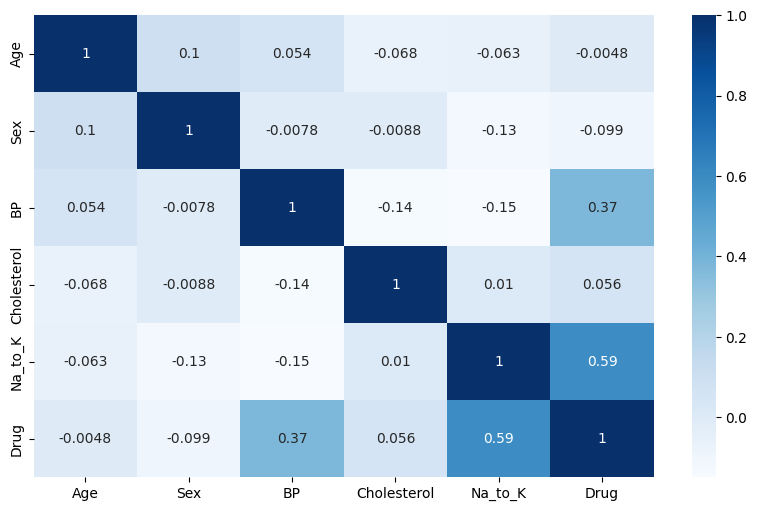

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt

# Calculate correlation only on numeric columns
corr = df.corr(numeric_only=True)
plt.figure(figsize=(10,6))
sns.heatmap(corr, annot=True, cmap="Blues")
plt.show()

Potential outliers based on IQR:
     Age  Sex  BP  Cholesterol  Na_to_K  Drug
24    33    0   1            0   33.486     4
96    58    0   1            0   38.247     4
98    20    1   0            1   35.639     4
128   47    1   1            1   33.542     4
131   52    1   1            1   32.922     4
184   18    0   0            0   37.188     4
188   65    1   0            1   34.997     4
194   46    0   0            0   34.686     4


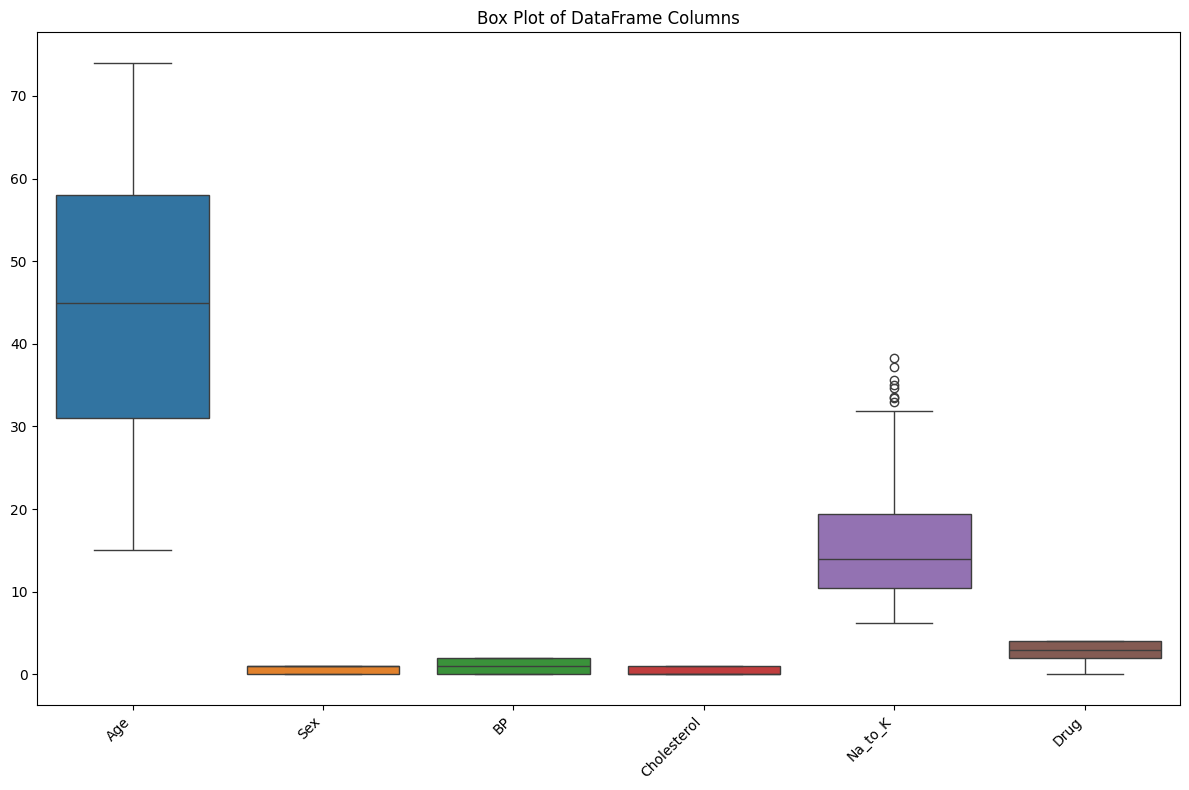

In [ ]:
# prompt: need to find outlayers

# Detect outliers using the IQR method
Q1 = df.quantile(0.25)
Q3 = df.quantile(0.75)
IQR = Q3 - Q1

# Identify outliers
outliers = df[((df < (Q1 - 1.5 * IQR)) | (df > (Q3 + 1.5 * IQR))).any(axis=1)]

print("Potential outliers based on IQR:")
print(outliers)

# Visualize data distribution with box plots to identify potential outliers
plt.figure(figsize=(12, 8))
sns.boxplot(data=df)
plt.title('Box Plot of DataFrame Columns')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()


DataFrame after capping outliers:
   Age  Sex  BP  Cholesterol  Na_to_K  Drug
0   23    0   0            0   25.355     4
1   47    1   1            0   13.093     2
2   47    1   1            0   10.114     2
3   28    0   2            0    7.798     3
4   61    0   1            0   18.043     4


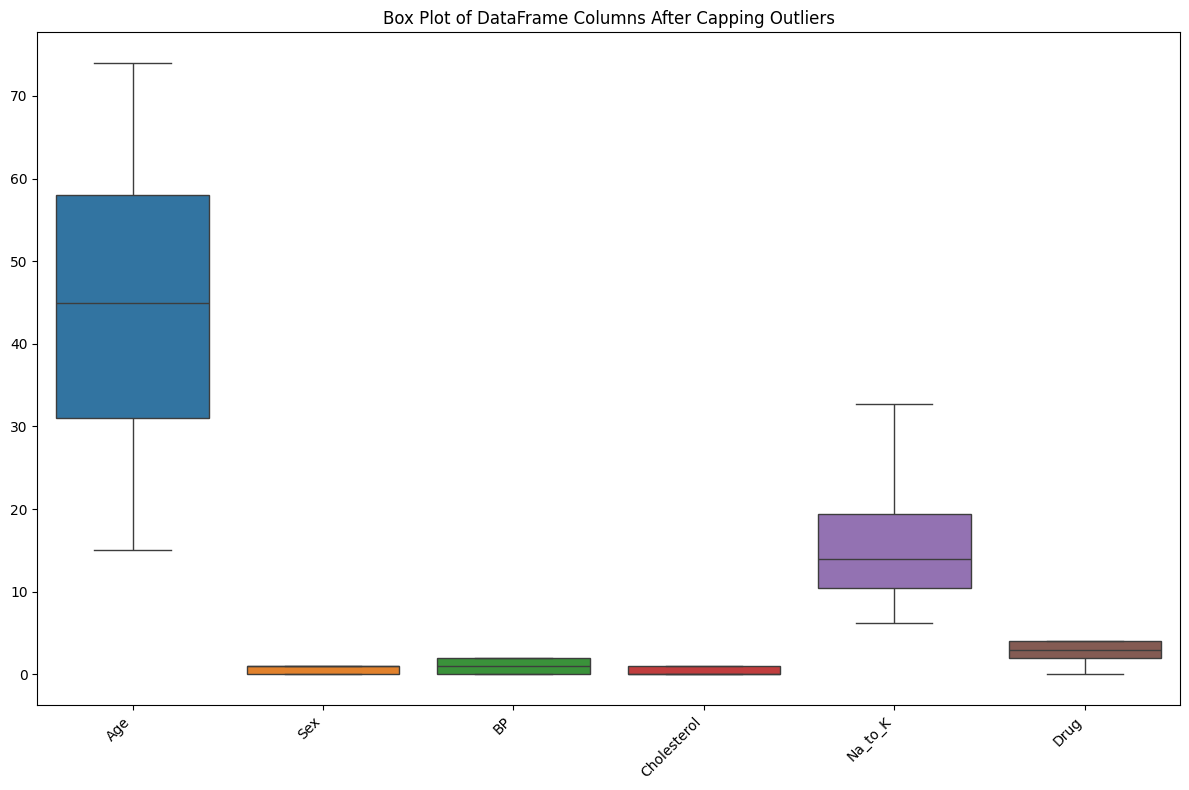

In [ ]:
# prompt: clear the maximum outlayers

# Cap the outliers using the IQR method
df_capped = df.copy()
for col in df.columns:
    if pd.api.types.is_numeric_dtype(df[col]): # Ensure the column is numeric
        Q1 = df[col].quantile(0.25)
        Q3 = df[col].quantile(0.75)
        IQR = Q3 - Q1
        lower_bound = Q1 - 1.5 * IQR
        upper_bound = Q3 + 1.5 * IQR
        df_capped[col] = df_capped[col].clip(lower=lower_bound, upper=upper_bound)

print("\nDataFrame after capping outliers:")
print(df_capped.head())

# Visualize the data distribution after capping outliers
plt.figure(figsize=(12, 8))
sns.boxplot(data=df_capped)
plt.title('Box Plot of DataFrame Columns After Capping Outliers')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()


In [ ]:
from sklearn.cluster import KMeans
wcss=[]
for i in range(1,11):
  kmeans=KMeans(n_clusters=i,init='k-means++',random_state=42)
  kmeans.fit(df)
  wcss.append(kmeans.inertia_)

In [ ]:
wcss

[65462.95116195501,
 25462.629663373336,
 17194.5362674016,
 15280.18366308386,
 11033.98872190211,
 9903.757658742854,
 7270.246998102786,
 6572.471526962296,
 5536.946577717918,
 5138.56051856822]

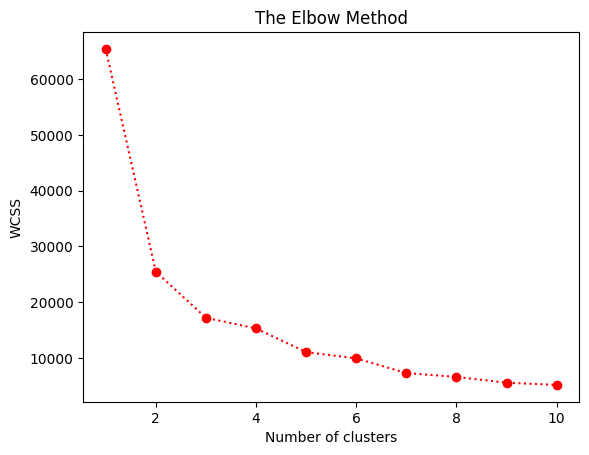

In [ ]:
import matplotlib.pyplot as plt
plt.plot(range(1,11),wcss,'o:r')
plt.title('The Elbow Method')
plt.xlabel('Number of clusters')
plt.ylabel('WCSS')
plt.show()

In [ ]:
data1 = KMeans(n_clusters=3,init='k-means++',random_state=42)
data1.fit(df)
y = data1.predict(df)
y

array([0, 2, 2, 0, 1, 0, 2, 2, 1, 2, 2, 0, 2, 1, 2, 0, 1, 2, 0, 0, 1, 1,
       2, 2, 0, 0, 0, 2, 2, 2, 0, 1, 2, 1, 2, 2, 0, 2, 2, 0, 1, 1, 2, 0,
       2, 1, 2, 1, 0, 0, 1, 1, 1, 0, 1, 0, 1, 2, 1, 0, 2, 0, 1, 2, 1, 1,
       0, 0, 1, 0, 1, 0, 0, 2, 0, 0, 2, 0, 0, 0, 1, 1, 0, 2, 2, 1, 2, 1,
       2, 2, 1, 2, 0, 2, 1, 2, 1, 1, 0, 0, 0, 2, 0, 1, 0, 2, 0, 2, 1, 0,
       2, 2, 2, 1, 0, 2, 1, 2, 0, 1, 0, 0, 0, 2, 2, 0, 1, 2, 2, 0, 1, 2,
       2, 0, 2, 1, 1, 2, 2, 1, 2, 1, 1, 1, 2, 1, 2, 0, 1, 0, 2, 1, 1, 1,
       2, 2, 0, 2, 1, 0, 0, 1, 2, 0, 0, 2, 1, 1, 2, 0, 0, 2, 2, 2, 2, 1,
       2, 0, 2, 1, 0, 1, 0, 2, 0, 1, 1, 2, 1, 1, 1, 0, 1, 1, 2, 1, 0, 2,
       0, 2], dtype=int32)

In [ ]:
x

,Age,Sex,BP,Cholesterol,Na_to_K
0,23,0,0,0,25.355
1,47,1,1,0,13.093
2,47,1,1,0,10.114
3,28,0,2,0,7.798
4,61,0,1,0,18.043
...,...,...,...,...,...
195,56,0,1,0,11.567
196,16,1,1,0,12.006
197,52,1,2,0,9.894
198,23,1,2,1,14.020


In [ ]:
df_new = pd.DataFrame(x)
df_new['cluster'] =y
df_new

,Age,Sex,BP,Cholesterol,Na_to_K,cluster
0,23,0,0,0,25.355,0
1,47,1,1,0,13.093,2
2,47,1,1,0,10.114,2
3,28,0,2,0,7.798,0
4,61,0,1,0,18.043,1
...,...,...,...,...,...,...
195,56,0,1,0,11.567,1
196,16,1,1,0,12.006,0
197,52,1,2,0,9.894,2
198,23,1,2,1,14.020,0


In [ ]:
df_new['cluster'].value_counts()

,count
cluster,
2,73
1,64
0,63


In [ ]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test = train_test_split(x,y,test_size=0.2,random_state=42)

In [ ]:
x_train

,Age,Sex,BP,Cholesterol,Na_to_K
79,32,0,1,1,10.840
197,52,1,2,0,9.894
38,39,0,2,1,9.709
24,33,0,1,0,33.486
122,34,1,2,0,22.456
...,...,...,...,...,...
106,22,1,2,0,11.953
14,50,0,2,0,12.703
92,29,0,0,0,29.450
179,67,0,2,0,15.891


In [ ]:
x_test

,Age,Sex,BP,Cholesterol,Na_to_K
95,36,1,1,1,11.424
15,16,0,0,1,15.516
30,18,0,2,1,8.750
158,59,0,1,0,10.444
128,47,1,1,1,33.542
115,51,1,0,0,18.295
69,18,0,0,1,24.276
170,28,0,2,0,12.879
174,42,1,0,1,12.766
45,66,0,2,1,8.107


In [ ]:
from sklearn.cluster import KMeans
from sklearn.model_selection import train_test_split
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score

In [ ]:
# Initialize KMeans with different cluster counts
cluster_counts = [5, 4, 3]
cluster_labels = {}


In [ ]:
# Fit KMeans and store labels
for k in cluster_counts:
    kmeans = KMeans(n_clusters=k, random_state=42, init='k-means++')
    kmeans.fit(df)
    cluster_labels[f'y{k}'] = kmeans.predict(df)

In [ ]:
# Models to evaluate
models = {
    "SVM": SVC(),
    "Decision Tree": DecisionTreeClassifier(),
    "Naive Bayes": GaussianNB(),
    "KNN": KNeighborsClassifier(),
    "Random Forest": RandomForestClassifier()
}

In [ ]:
# Iterate over each clustering label set and model
for name, y in cluster_labels.items():
    print(f"\nEvaluating for cluster label set {name}")
    x_train, x_test, y_train, y_test = train_test_split(df, y, test_size=0.2, random_state=42)

    for model_name, model in models.items():
        model.fit(x_train, y_train)
        y_pred = model.predict(x_test)
        score = accuracy_score(y_test, y_pred)
        print(f"{model_name}: Accuracy = {score:.4f}")


Evaluating for cluster label set y5
SVM: Accuracy = 1.0000
Decision Tree: Accuracy = 0.9750
Naive Bayes: Accuracy = 0.8500
KNN: Accuracy = 0.9750
Random Forest: Accuracy = 1.0000

Evaluating for cluster label set y4
SVM: Accuracy = 0.9250
Decision Tree: Accuracy = 0.9250
Naive Bayes: Accuracy = 0.9500
KNN: Accuracy = 0.9250
Random Forest: Accuracy = 0.8500

Evaluating for cluster label set y3
SVM: Accuracy = 1.0000
Decision Tree: Accuracy = 0.9750
Naive Bayes: Accuracy = 0.9500
KNN: Accuracy = 0.9750
Random Forest: Accuracy = 0.9750


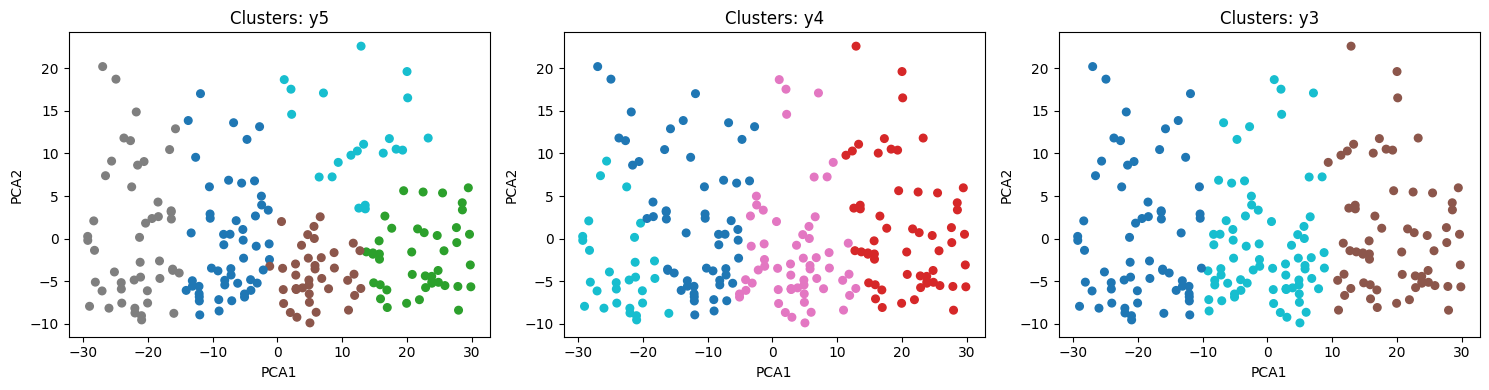

In [ ]:
import matplotlib.pyplot as plt
from sklearn.decomposition import PCA

# Reduce features to 2D for plotting
pca = PCA(n_components=2)
df_2d = pca.fit_transform(df)

# Plotting each clustering case
plt.figure(figsize=(15, 4))

for i, (name, labels) in enumerate(cluster_labels.items(), 1):
    plt.subplot(1, len(cluster_labels), i)
    plt.scatter(df_2d[:, 0], df_2d[:, 1], c=labels, cmap='tab10', s=30)
    plt.title(f'Clusters: {name}')
    plt.xlabel('PCA1')
    plt.ylabel('PCA2')

plt.tight_layout()
plt.show()